In [1]:
from collections import Counter
import re
import urllib2
from itertools import combinations
from random import sample
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
WORDS = urllib2.urlopen("https://raw.githubusercontent.com/maidis/mythes-tr/master/veriler/kelime-listesi.txt").read()
WORDS1 = WORDS.split("\n")

In [3]:
def subword(word1, word2):
    """Checks whether word1 is a *subword* of a word2. 
    A word w1 is a subword of another word w2 if all the characthers of w1 is in w2."""
    
    if len(word1) > len(word2):
        return False
    
    temp = Counter(word2)
    for k,v in Counter(word1).iteritems():
        #print k, temp[k], v
        if temp[k] < v:
            #print "not a subword"
            return False
    else:
        #print word1 +" is a subword of "+ word2 +"."
        return True

In [4]:
def pismanliklarlistesi(anahtar):
    pismanliklar_listesi = []
    for word in WORDS1:
        if len(word)>3 and subword(word, anahtar):
            pismanliklar_listesi.append(word)
    return pismanliklar_listesi

In [10]:
anahtar = "görelelibas"

pismanliklar_listesi = pismanliklarlistesi(anahtar)
print len(pismanliklar_listesi)
pismanliklar_listesi = sorted(
    pismanliklar_listesi, key=lambda x: len(x.decode('UTF-8')) , reverse=True)
for w in pismanliklar_listesi:
    print w, len(w.decode('UTF-8'))

128
bölgesel 8
aileler 7
belgeli 7
gelberi 7
liberal 7
rasgele 7
sabiler 7
algler 6
bereli 6
besair 6
elbise 6
galebe 6
galeri 6
galler 6
garibe 6
gelesi 6
göreli 6
görsel 6
risale 6
abril 5
basil 5
basir 5
belge 5
belgi 5
belli 5
berge 5
bergi 5
beril 5
besli 5
bilar 5
bilge 5
birge 5
bölge 5
ebeli 5
egeli 5
elbir 5
eller 5
ergil 5
eseri 5
esire 5
garbi 5
garib 5
gasil 5
gebre 5
gelir 5
gelse 5
glase 5
göbel 5
ibare 5
irsal 5
isale 5
laser 5
legal 5
libas 5
libre 5
ragbi 5
ralli 5
sarig 5
sebil 5
sergi 5
sigar 5
sille 5
abes 4
abis 4
abli 4
agel 4
aile 4
alil 4
asil 4
bale 4
beis 4
bera 4
bere 4
beri 4
besi 4
bige 4
bile 4
bira 4
böle 4
böri 4
elbe 4
elli 4
ergi 4
eril 4
erse 4
eser 4
esir 4
esre 4
esri 4
gabi 4
gale 4
gali 4
gari 4
gebe 4
gele 4
geri 4
göre 4
gres 4
gril 4
iare 4
ibla 4
ibra 4
ibre 4
ilga 4
ille 4
isal 4
liga 4
lira 4
lise 4
öger 4
örge 4
reel 4
reis 4
röle 4
sabi 4
sair 4
sele 4
sera 4
sere 4
seri 4
söbe 4
bög 3
göl 3
lös 3
öge 3
öib 3
örs 3
sör 3


In [10]:
#TODO: ğ'li, 2 kelimeli ve uzun kelimeleri filtrele

WORDS2 = [word for word in WORDS1 if word.count(' ') == 0 and 3 < len(word.decode('UTF-8')) < 9 and word.count('ğ') == 0  ]

In [5]:
len(WORDS2)

33032

In [101]:
dagilim = []
for _ in range(1000):
    [w1, w2] = sample(WORDS2, 2)
    if w1.count(' ') == 0 and w2.count(' ') == 0 and len(w1.decode('UTF-8')) < 9 and len(w2.decode('UTF-8')) < 9:
        anahtar = "".join([w1, w2])
        x = len(pismanliklarlistesi(anahtar))
        print w1, w2,  x
        dagilim.append(x)

taksici guarani 358
harabati çalgıç 262
iltisak cırt 260
dahletme basir 866
orduevi mübaşir 301
gidişme çilek 336
manti esas 117
partili ferah 260
rana züht 46
dölütte kalıpta 178
dede yapmacık 132
melis söyleyiş 131
tartıcı lostromo 198
hasım dervişan 631
çivisiz özsel 62
mukannen kavaflık 367
atın örklemek 400
firkat bunalmak 840
yanmak pipet 278
barka trinketa 368
serap tamirci 288
motelci pullukçu 269
koldaş badema 202
özünden dadaizm 172
döşenmek sıvatma 674
kıyasi dalsı 177
işbilim basso 87
lezzet hartadan 242
kesiş görüş 89
profil devasız 406
çıplanma mecelle 200
agitato arpacık 257
düalizm tarkanç 706
kibarca tura 139
sıvacı istikrah 401
atılış endokrin 907
bravo kurut 104
adaklık gedmek 172
ömrünce çatkın 357
aort heybe 64
bayahtan sterol 523
terekeme oturtmak 279
kinci dörtlü 109
toka yaygır 155
bilinç rodeo 137
kartça karın 214
içgüveyi kavata 146
tahnit paççı 100
zennelik özgür 284
ayam evgi 30
bahşi guguklu 84
geceki yanlar 376
maslahat gelmiç 396
kelebek gevşek 38
platika

In [115]:
len([d for d in dagilim if 50<d<140])

203

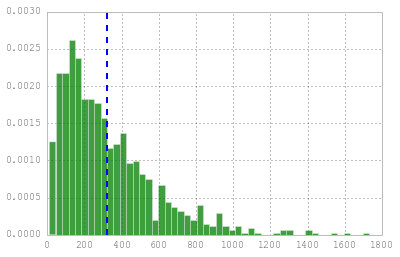

In [109]:
plt.hist(dagilim, 50, normed=1, facecolor='green', alpha=0.75);
plt.axvline((sum(dagilim) / len(dagilim)), color='b', linestyle='dashed', linewidth=2)